In [1]:
#importing modules
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import precision_score, recall_score, f1_score

In [2]:
# defining data path
data_path=Path('resources/cancer_patient_data_sets.csv')
# Reading data source using pandas
cancer_df=pd.read_csv(data_path)

In [3]:
# looking for dataframe
cancer_df.head()

,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,P1,33,1,2,4,5,4,3,2,2,...,3,4,2,2,3,1,2,3,4,Low
1,P10,17,1,3,1,5,3,4,2,2,...,1,3,7,8,6,2,1,7,2,Medium
2,P100,35,1,4,5,6,5,5,4,6,...,8,7,9,2,1,4,6,7,2,High
3,P1000,37,1,7,7,7,7,6,7,7,...,4,2,3,1,4,5,6,7,5,High
4,P101,46,1,6,8,7,7,7,6,7,...,3,2,4,1,4,2,4,2,3,High


In [82]:
cancer_df=cancer_df[['Coughing of Blood','Obesity','Smoking','Fatigue',
                     'Alcohol use','Balanced Diet','Air Pollution', 'Level']]

In [84]:
cancer_df.columns

Index(['Coughing of Blood', 'Obesity', 'Smoking', 'Fatigue', 'Alcohol use',
       'Balanced Diet', 'Air Pollution', 'Level'],
      dtype='object')

In [85]:
'Alcohol use', 'Dust Allergy','Balanced Diet', 'Obesity''Smoking',

('Alcohol use', 'Dust Allergy', 'Balanced Diet', 'ObesitySmoking')

In [86]:
# shape of dataframe
cancer_df.shape

(1000, 8)

In [87]:
#data types of dataframe
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Coughing of Blood  1000 non-null   int64 
 1   Obesity            1000 non-null   int64 
 2   Smoking            1000 non-null   int64 
 3   Fatigue            1000 non-null   int64 
 4   Alcohol use        1000 non-null   int64 
 5   Balanced Diet      1000 non-null   int64 
 6   Air Pollution      1000 non-null   int64 
 7   Level              1000 non-null   object
dtypes: int64(7), object(1)
memory usage: 62.6+ KB


In [88]:
#looking for target columns
cancer_df['Level'].value_counts()

High      365
Medium    332
Low       303
Name: Level, dtype: int64

In [89]:
#cancer_df['Level']=cancer_df['Level'].replace('Medium', 'Low')

In [90]:
#looking for target columns
cancer_df['Level'].value_counts()

High      365
Medium    332
Low       303
Name: Level, dtype: int64

In [92]:
#dropping unnecessary columns
#cancer_df.drop(columns=['Patient Id'], inplace=True)

In [93]:
# create feature matrix (X)
#selecting all columns except 'Revenue'
X=cancer_df.drop('Level', axis=1) 

# create response vector (y)
##selecting 'Revenue' column
y=cancer_df['Level'].values 

In [94]:
# Converting output labels to 0 and 1
y_label = LabelEncoder().fit_transform(y)
y_label

array([1, 2, 0, 0, 0, 0, 1, 1, 2, 2, 0, 0, 2, 0, 1, 2, 2, 0, 0, 2, 0, 0,
       0, 0, 0, 2, 2, 2, 0, 2, 0, 0, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 2, 2, 2,
       2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 2, 0, 0, 0, 1, 1, 2, 2, 0, 0, 2, 0, 1, 2, 2, 0, 0, 2, 0,
       0, 0, 0, 2, 2, 2, 2, 0, 2, 0, 0, 2, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 1, 0, 0, 0, 1, 1, 2, 2, 0, 0, 2, 1, 1, 2, 2, 0, 0, 2,
       0, 0, 0, 0, 1, 2, 2, 2, 0, 2, 0, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [95]:
#Training set**: Used to train the classifier.
#Testing set**: Used to estimate the error rate of the trained classifier.
X_train, X_test, y_train, y_test = train_test_split(X, y_label, random_state=42)

In [96]:
# Scaling the X data by using StandardScaler()
#scaler = StandardScaler().fit(X_train)
#X_train_scaled = scaler.transform(X_train)
X_train_scaled=X_train

In [97]:
# Transforming the test dataset based on the fit from the training dataset
#X_test_scaled = scaler.transform(X_test)
X_test_scaled=X_test

## Model score function using train data only

In [98]:
#defining function for model scoring with training set only
def train_score(model, X_train_scaled=X_train_scaled,
                X_test_scaled=X_test_scaled, y_train=y_train,y_test=y_test):
    #printing the accuracy score
    train_score=model.score(X_train_scaled, y_train)
    print("****************Train Score******************")
    print(train_score)
    print()
    
    cvs=cross_val_score(model,X_train_scaled, y_train,cv=3, scoring='accuracy' )
    print("**********Using K=3 cross validation**********")
    print(cvs)
    print()
    
    #predection on the test set and confusion matrix
    y_train_pred=cross_val_predict(model,X_train_scaled, y_train,cv=3)
    cm=confusion_matrix(y_train, y_train_pred)
    print("************Confusion Matrix using cross_val_predict******************")
    print(cm)
    print()
    
    #classification report
    cr=classification_report(y_train, y_train_pred)
    print("********Classification Report******************")
    print(cr)
    print()
    



## Model score function using both train and test data 

In [99]:
#defining function for model scoring with test set
def test_score(model, X_train_scaled=X_train_scaled,X_test_scaled=X_test_scaled, 
               y_train=y_train,y_test=y_test):
    #printing the accuracy score
    train_score=model.score(X_train_scaled, y_train)
    test_score=model.score(X_test_scaled, y_test)
    print("****************Train Score******************")
    print(train_score)
    print()

    print("*****************Test Score******************")
    print(test_score)
    print()
    
    #predection on the test set and confusion matrix
    y_pred=model.predict(X_test_scaled)
    cm=confusion_matrix(y_test, y_pred)
    print("************Confusion Matrix******************")
    print(cm)
    print()
    
    #classification report
    cr=classification_report(y_test, y_pred)
    print("********Classification Report******************")
    print(cr)
    print()
    

    


## Stochastic Gradent Descent Classifier

In [100]:
# Creating a sgd classifier model on the scaled data
sgd=SGDClassifier(random_state=42, loss='log')

# Fit the model to the data
sgd.fit(X_train_scaled, y_train)

SGDClassifier(loss='log', random_state=42)

In [101]:
#score for logistic regression using only training data
train_score(sgd)

****************Train Score******************
0.8733333333333333

**********Using K=3 cross validation**********
[0.876 0.792 0.776]

************Confusion Matrix using cross_val_predict******************
[[259   0   2]
 [  2 223  12]
 [ 32  91 129]]

********Classification Report******************
              precision    recall  f1-score   support

           0       0.88      0.99      0.94       261
           1       0.71      0.94      0.81       237
           2       0.90      0.51      0.65       252

    accuracy                           0.81       750
   macro avg       0.83      0.82      0.80       750
weighted avg       0.84      0.81      0.80       750




## KNeighbors Classifier

In [102]:
# Creating a Kneighbors classifier model on the scaled data
knn= KNeighborsClassifier(n_neighbors=3)

# Fit the model to the data
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=3)

In [103]:
#score for Kneighbors classifier using only training data
train_score(knn)

****************Train Score******************
1.0

**********Using K=3 cross validation**********
[1.    0.972 1.   ]

************Confusion Matrix using cross_val_predict******************
[[254   0   7]
 [  0 237   0]
 [  0   0 252]]

********Classification Report******************
              precision    recall  f1-score   support

           0       1.00      0.97      0.99       261
           1       1.00      1.00      1.00       237
           2       0.97      1.00      0.99       252

    accuracy                           0.99       750
   macro avg       0.99      0.99      0.99       750
weighted avg       0.99      0.99      0.99       750




k: 1, Train/Test Score: 1.000/1.000
k: 3, Train/Test Score: 1.000/1.000
k: 5, Train/Test Score: 1.000/1.000
k: 7, Train/Test Score: 1.000/1.000
k: 9, Train/Test Score: 1.000/1.000


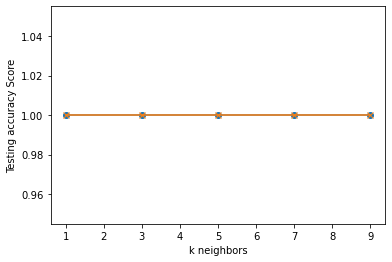

In [104]:
# Loop through different k values to find which has the highest accuracy.
train_scores = []
test_scores = []
for k in range(1, 10, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    tra_score = knn.score(X_train_scaled, y_train)
    tes_score = knn.score(X_test_scaled, y_test)
    train_scores.append(tra_score)
    test_scores.append(tes_score)
    print(f"k: {k}, Train/Test Score: {tra_score:.3f}/{tes_score:.3f}")
    
#plotting knn scores
plt.plot(range(1, 10, 2), train_scores, marker='o')
plt.plot(range(1, 10, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [105]:
# Creating a Kneighbors classifier model on the scaled data
knn_5= KNeighborsClassifier(n_neighbors=5)

# Fit the model to the data
knn_5.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [106]:
#score for Kneighbors classifier using training and test data
train_score(knn_5)

****************Train Score******************
1.0

**********Using K=3 cross validation**********
[1.    0.972 1.   ]

************Confusion Matrix using cross_val_predict******************
[[254   0   7]
 [  0 237   0]
 [  0   0 252]]

********Classification Report******************
              precision    recall  f1-score   support

           0       1.00      0.97      0.99       261
           1       1.00      1.00      1.00       237
           2       0.97      1.00      0.99       252

    accuracy                           0.99       750
   macro avg       0.99      0.99      0.99       750
weighted avg       0.99      0.99      0.99       750




### Tuning hyperparamaters  using Grid Search CV for knn

In [107]:
#### Using GridSearchCV
param_grid_knn = {'weights': ['uniform','distance'],
              'algorithm': ['auto','ball_tree', 'kd_tree'],
             'n_neighbors':[1,5,8,10]}
grid_knn = GridSearchCV(knn_5, param_grid_knn, verbose=4, n_jobs=-1)

In [108]:
grid_knn.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree'],
                         'n_neighbors': [1, 5, 8, 10],
                         'weights': ['uniform', 'distance']},
             verbose=4)

In [109]:
# List the best parameters for this dataset
print(grid_knn.best_params_)

{'algorithm': 'auto', 'n_neighbors': 1, 'weights': 'uniform'}


In [110]:
# List the best score
print(grid_knn.best_score_)

1.0


In [111]:
#best estimator
knn_b=grid_knn.best_estimator_
knn_b

KNeighborsClassifier(n_neighbors=1)

In [112]:
#score for logistic regression using training and test data
train_score(knn_b)

****************Train Score******************
1.0

**********Using K=3 cross validation**********
[1. 1. 1.]

************Confusion Matrix using cross_val_predict******************
[[261   0   0]
 [  0 237   0]
 [  0   0 252]]

********Classification Report******************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       261
           1       1.00      1.00      1.00       237
           2       1.00      1.00      1.00       252

    accuracy                           1.00       750
   macro avg       1.00      1.00      1.00       750
weighted avg       1.00      1.00      1.00       750




## Support Vector Classifier

In [113]:
# Creating a support vector classifier model on the scaled data
svc= SVC(kernel='linear',  probability=True)

# Fit the model to the data
svc.fit(X_train_scaled, y_train)

SVC(kernel='linear', probability=True)

In [114]:
#score for support vector classifier using only training data
train_score(svc)

****************Train Score******************
0.924

**********Using K=3 cross validation**********
[0.896 0.904 0.928]

************Confusion Matrix using cross_val_predict******************
[[254   0   7]
 [  1 201  35]
 [  0  25 227]]

********Classification Report******************
              precision    recall  f1-score   support

           0       1.00      0.97      0.98       261
           1       0.89      0.85      0.87       237
           2       0.84      0.90      0.87       252

    accuracy                           0.91       750
   macro avg       0.91      0.91      0.91       750
weighted avg       0.91      0.91      0.91       750




### Tuning hyperparamaters  using Randomized Search CV for SVC

In [115]:
#### Using GridSearchCV
param_rand_svc ={
              'C': [1.0,2.0],
                'kernel':['linear', 'poly','rbf'],
                'gamma':['auto','scale']}
rand_svc = RandomizedSearchCV(svc, param_rand_svc, cv=3, verbose=4, n_jobs=-1)

In [116]:
rand_svc.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=SVC(kernel='linear', probability=True),
                   n_jobs=-1,
                   param_distributions={'C': [1.0, 2.0],
                                        'gamma': ['auto', 'scale'],
                                        'kernel': ['linear', 'poly', 'rbf']},
                   verbose=4)

In [117]:
# List the best parameters for this dataset
print(rand_svc.best_params_)

{'kernel': 'rbf', 'gamma': 'auto', 'C': 2.0}


In [118]:
# List the best score
print(rand_svc.best_score_)

1.0


In [119]:
#best estimator
svc_R_b=rand_svc.best_estimator_
svc_R_b

SVC(C=2.0, gamma='auto', probability=True)

In [120]:
#score for logistic regression using training and test data
train_score(svc_R_b)

****************Train Score******************
1.0

**********Using K=3 cross validation**********
[1. 1. 1.]

************Confusion Matrix using cross_val_predict******************
[[261   0   0]
 [  0 237   0]
 [  0   0 252]]

********Classification Report******************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       261
           1       1.00      1.00      1.00       237
           2       1.00      1.00      1.00       252

    accuracy                           1.00       750
   macro avg       1.00      1.00      1.00       750
weighted avg       1.00      1.00      1.00       750




## Decision Tree Classifier

In [121]:
# Creating a Decision Tree model on the scaled data
dt= DecisionTreeClassifier()

# Fit the model to the data
dt.fit(X_train_scaled, y_train)

DecisionTreeClassifier()

In [122]:
#score for Decision Tree using only training data
train_score(dt)

****************Train Score******************
1.0

**********Using K=3 cross validation**********
[1. 1. 1.]

************Confusion Matrix using cross_val_predict******************
[[261   0   0]
 [  0 237   0]
 [  0   0 252]]

********Classification Report******************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       261
           1       1.00      1.00      1.00       237
           2       1.00      1.00      1.00       252

    accuracy                           1.00       750
   macro avg       1.00      1.00      1.00       750
weighted avg       1.00      1.00      1.00       750




[0.38445856 0.12914372 0.         0.16603537 0.22817547 0.01984889
 0.07233799]


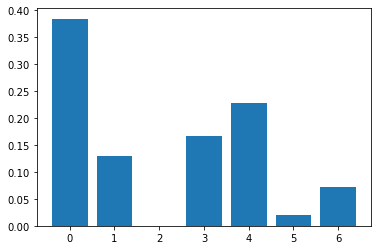

In [123]:
# plotting columns with its importances
features_dt = dt.feature_importances_
print(features_dt)
plt.bar(x = range(len(features_dt)), height=features_dt)
plt.show()

### Tuning hyperparamaters  using Randomized Search CV for Decision Tree

In [124]:
#### Using GridSearchCV
param_rand_dt ={
              'criterion': ['gini','entropy'],
             'max_depth':[1,2,5,10,100,1000,10000],
                'min_samples_leaf':[1,5,10,100,1000,10000],
                'max_features':['auto','sqrt','log2']}
rand_dt = RandomizedSearchCV(dt, param_rand_dt, cv=3, verbose=4, n_jobs=-1)

In [125]:
rand_dt.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [1, 2, 5, 10, 100, 1000,
                                                      10000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 5, 10, 100,
                                                             1000, 10000]},
                   verbose=4)

In [126]:
# List the best parameters for this dataset
print(rand_dt.best_params_)

{'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 1000, 'criterion': 'gini'}


In [127]:
# List the best score
print(rand_dt.best_score_)

1.0


In [128]:
#best estimator
dt_R_b=rand_dt.best_estimator_
dt_R_b

DecisionTreeClassifier(max_depth=1000, max_features='auto')

In [129]:
#score for logistic regression using training and test data
train_score(dt_R_b)

****************Train Score******************
1.0

**********Using K=3 cross validation**********
[1. 1. 1.]

************Confusion Matrix using cross_val_predict******************
[[261   0   0]
 [  0 237   0]
 [  0   0 252]]

********Classification Report******************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       261
           1       1.00      1.00      1.00       237
           2       1.00      1.00      1.00       252

    accuracy                           1.00       750
   macro avg       1.00      1.00      1.00       750
weighted avg       1.00      1.00      1.00       750




## Bagging

## a. Random Forest Classifier
Instead of having one decision tree, we make more random trees and average their output.

In [130]:
# Creating a Random Forest Classifer model on the scaled data
rf= RandomForestClassifier()

# Fit the model to the data
rf.fit(X_train_scaled, y_train)

RandomForestClassifier()

In [131]:
#score for Random Forest Classifer using only training data
train_score(rf)

****************Train Score******************
1.0

**********Using K=3 cross validation**********
[1. 1. 1.]

************Confusion Matrix using cross_val_predict******************
[[261   0   0]
 [  0 237   0]
 [  0   0 252]]

********Classification Report******************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       261
           1       1.00      1.00      1.00       237
           2       1.00      1.00      1.00       252

    accuracy                           1.00       750
   macro avg       1.00      1.00      1.00       750
weighted avg       1.00      1.00      1.00       750




[0.20151228 0.18308529 0.08899788 0.16082061 0.15672259 0.10352809
 0.10533325]


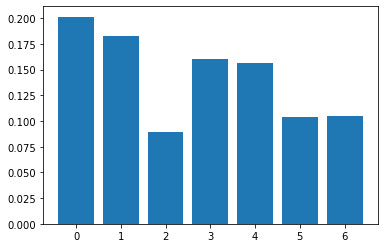

In [132]:
# plotting columns with its importances
features_rf = rf.feature_importances_
print(features_rf)
plt.bar(x = range(len(features_rf)), height=features_rf)
plt.show()

### Tuning hyperparamaters  using Randomized Search CV for Random Forest

In [37]:
#### Using GridSearchCV
param_rand_rf = {'n_estimators':[100,200,500],
              'criterion': ['gini','entropy'],
             'max_depth':[1,2,5,10,100,1000,10000],
                'min_samples_leaf':[1,5,10,100,1000,10000],
                'max_features':['auto','sqrt','log2']}
rand_rf = RandomizedSearchCV(rf, param_rand_rf, cv=3, verbose=1, n_jobs=-1)

In [38]:
rand_rf.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [1, 2, 5, 10, 100, 1000,
                                                      10000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 5, 10, 100,
                                                             1000, 10000],
                                        'n_estimators': [100, 200, 500]},
                   verbose=1)

In [39]:
# List the best parameters for this dataset
print(rand_rf.best_params_)

{'n_estimators': 500, 'min_samples_leaf': 5, 'max_features': 'log2', 'max_depth': 10, 'criterion': 'gini'}


In [40]:
# List the best score
print(rand_rf.best_score_)

0.9906666666666667


In [41]:
#best estimator
rf_R_b=rand_rf.best_estimator_
rf_R_b

RandomForestClassifier(max_depth=10, max_features='log2', min_samples_leaf=5,
                       n_estimators=500)

In [42]:
#score for logistic regression using training and test data
train_score(rf_R_b)

****************Train Score******************
1.0

**********Using K=3 cross validation**********
[1.    0.972 1.   ]

************Confusion Matrix using cross_val_predict******************
[[254   0   7]
 [  0 237   0]
 [  0   0 252]]

********Classification Report******************
              precision    recall  f1-score   support

           0       1.00      0.97      0.99       261
           1       1.00      1.00      1.00       237
           2       0.97      1.00      0.99       252

    accuracy                           0.99       750
   macro avg       0.99      0.99      0.99       750
weighted avg       0.99      0.99      0.99       750




In [43]:
test_score(rf_R_b)

****************Train Score******************
1.0

*****************Test Score******************
1.0

************Confusion Matrix******************
[[104   0   0]
 [  0  66   0]
 [  0   0  80]]

********Classification Report******************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       104
           1       1.00      1.00      1.00        66
           2       1.00      1.00      1.00        80

    accuracy                           1.00       250
   macro avg       1.00      1.00      1.00       250
weighted avg       1.00      1.00      1.00       250




## b. Extremely Random Trees
Changing the behavior of the decision trees so that they randomly choose their splits

In [44]:
# Creating a Extremely Random Trees model on the scaled data
rt= ExtraTreesClassifier()

# Fit the model to the data
rt.fit(X_train_scaled, y_train)

ExtraTreesClassifier()

In [45]:
#score for Extremely Random Trees using only training data
train_score(rt)

****************Train Score******************
1.0

**********Using K=3 cross validation**********
[1. 1. 1.]

************Confusion Matrix using cross_val_predict******************
[[261   0   0]
 [  0 237   0]
 [  0   0 252]]

********Classification Report******************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       261
           1       1.00      1.00      1.00       237
           2       1.00      1.00      1.00       252

    accuracy                           1.00       750
   macro avg       1.00      1.00      1.00       750
weighted avg       1.00      1.00      1.00       750




[0.00342819 0.00269341 0.05866494 0.04976185 0.03589523 0.0371681
 0.03045478 0.03382264 0.07419258 0.07828603 0.03495366 0.06773494
 0.04273835 0.08782149 0.05720293 0.03024705 0.06151874 0.04883132
 0.04063753 0.03280068 0.02840609 0.02889632 0.03384314]


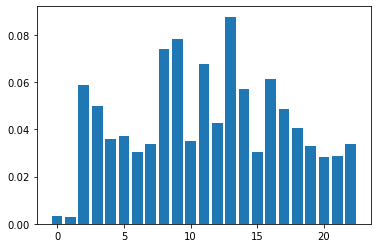

In [46]:
# plotting columns with its importances
features_rt = rt.feature_importances_
print(features_rt)
plt.bar(x = range(len(features_rt)), height=features_rt)
plt.show()

### Tuning hyperparamaters  using Randomized Search CV for Extremely Random Tree

In [47]:
#### Using GridSearchCV
param_rand_rt = {'n_estimators':[100,200,500],
              'criterion': ['gini','entropy'],
             'max_depth':[5,10,1000,10000],
                'min_samples_leaf':[10,100,1000,10000],
                'max_features':['auto','sqrt','log2']}
rand_rt = RandomizedSearchCV(rt, param_rand_rt, cv=3, verbose=1, n_jobs=-1)

In [48]:
rand_rt.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=ExtraTreesClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [5, 10, 1000, 10000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [10, 100, 1000,
                                                             10000],
                                        'n_estimators': [100, 200, 500]},
                   verbose=1)

In [49]:
# List the best parameters for this dataset
print(rand_rt.best_params_)

{'n_estimators': 200, 'min_samples_leaf': 10, 'max_features': 'log2', 'max_depth': 10, 'criterion': 'entropy'}


In [50]:
# List the best score
print(rand_rt.best_score_)

0.9906666666666667


In [51]:
#best estimator
rt_R_b=rand_rt.best_estimator_
rt_R_b

ExtraTreesClassifier(criterion='entropy', max_depth=10, max_features='log2',
                     min_samples_leaf=10, n_estimators=200)

In [52]:
#score for logistic regression using training and test data
train_score(rt_R_b)

****************Train Score******************
1.0

**********Using K=3 cross validation**********
[1.    0.972 1.   ]

************Confusion Matrix using cross_val_predict******************
[[254   0   7]
 [  0 237   0]
 [  0   0 252]]

********Classification Report******************
              precision    recall  f1-score   support

           0       1.00      0.97      0.99       261
           1       1.00      1.00      1.00       237
           2       0.97      1.00      0.99       252

    accuracy                           0.99       750
   macro avg       0.99      0.99      0.99       750
weighted avg       0.99      0.99      0.99       750




## Boosting
In Bosting each new weak learner is trained on data that skews the training dataset to data points that the previous weak learners didn't estimate well.

In [54]:
# Creating a AdaBoostClassifier model on the scaled data
ab= AdaBoostClassifier(base_estimator = rf)

# Fit the model to the data
ab.fit(X_train_scaled, y_train)

AdaBoostClassifier(base_estimator=RandomForestClassifier())

In [55]:
#score for logistic regression using only training data
train_score(ab)

****************Train Score******************
1.0

**********Using K=3 cross validation**********
[1. 1. 1.]

************Confusion Matrix using cross_val_predict******************
[[261   0   0]
 [  0 237   0]
 [  0   0 252]]

********Classification Report******************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       261
           1       1.00      1.00      1.00       237
           2       1.00      1.00      1.00       252

    accuracy                           1.00       750
   macro avg       1.00      1.00      1.00       750
weighted avg       1.00      1.00      1.00       750




[0.00661083 0.00032671 0.03623356 0.06574451 0.04001544 0.03644896
 0.03803291 0.01180653 0.05088455 0.10548592 0.04110959 0.06342674
 0.02893137 0.11069823 0.07092891 0.01870591 0.03564619 0.08832865
 0.03740501 0.04240199 0.02448216 0.01538354 0.03096177]


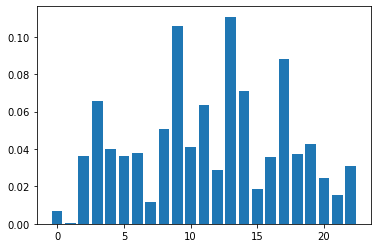

In [56]:
# plotting columns with its importances
features_ab = ab.feature_importances_
print(features_ab)
plt.bar(x = range(len(features_ab)), height=features_ab)
plt.show()

### Tuning hyperparamaters  using Randomized Search CV for AdaBoostClassifier

In [57]:
#### Using GridSearchCV
param_rand_ab = {'n_estimators':[100,200,500, 1000, 2000, 5000],
             'learning_rate':[0.1,0.2,0.5]}
rand_ab = RandomizedSearchCV(ab, param_rand_ab, cv=3, verbose=1, n_jobs=-1)

In [58]:
rand_ab.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3,
                   estimator=AdaBoostClassifier(base_estimator=RandomForestClassifier()),
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.1, 0.2, 0.5],
                                        'n_estimators': [100, 200, 500, 1000,
                                                         2000, 5000]},
                   verbose=1)

In [59]:
# List the best parameters for this dataset
print(rand_ab.best_params_)

{'n_estimators': 500, 'learning_rate': 0.1}


In [60]:
# List the best score
print(rand_ab.best_score_)

1.0


In [61]:
#best estimator
ab_R_b=rand_ab.best_estimator_
ab_R_b

AdaBoostClassifier(base_estimator=RandomForestClassifier(), learning_rate=0.1,
                   n_estimators=500)

In [62]:
#score for logistic regression using training and test data
train_score(ab_R_b)

****************Train Score******************
1.0

**********Using K=3 cross validation**********
[1. 1. 1.]

************Confusion Matrix using cross_val_predict******************
[[261   0   0]
 [  0 237   0]
 [  0   0 252]]

********Classification Report******************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       261
           1       1.00      1.00      1.00       237
           2       1.00      1.00      1.00       252

    accuracy                           1.00       750
   macro avg       1.00      1.00      1.00       750
weighted avg       1.00      1.00      1.00       750




## Real and predicted value using different model

In [66]:
#Predected value
y_pred_sgd=sgd.predict(X_test_scaled)
y_pred_lr=lr.predict(X_test_scaled)
y_pred_rf=rf.predict(X_test_scaled)
y_pred_rt=rt.predict(X_test_scaled)
y_pred_ab=ab.predict(X_test_scaled)

In [69]:
df_pred=pd.DataFrame({'Real value':y_test,
                     'SGD Classifier':y_pred_sgd,
                     'Logistic Regression':y_pred_lr,
                     'Random Forest':y_pred_rf,
                     'Extra Random Tree':y_pred_rt,
                     'AdaBoost':y_pred_ab})
df_pred

,Real value,SGD Classifier,Logistic Regression,Random Forest,Extra Random Tree,AdaBoost
0,2,2,2,2,2,2
1,2,2,2,2,2,2
2,2,2,2,2,2,2
3,0,0,0,0,0,0
4,2,2,2,2,2,2
...,...,...,...,...,...,...
245,0,0,0,0,0,0
246,0,0,0,0,0,0
247,2,2,2,2,2,2
248,2,2,2,2,2,2


SGD Classifier
****************Train Score******************
1.0

*****************Test Score******************
1.0

************Confusion Matrix******************
[[104   0]
 [  0 146]]

********Classification Report******************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       104
           1       1.00      1.00      1.00       146

    accuracy                           1.00       250
   macro avg       1.00      1.00      1.00       250
weighted avg       1.00      1.00      1.00       250


ROC Curve


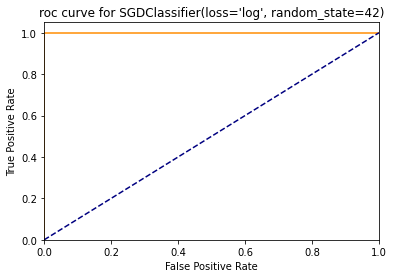


************Area under the curve******************
1.0
None
****************************************************************************************************
****************************************************************************************************

Logistic Regression
****************Train Score******************
1.0

*****************Test Score******************
1.0

************Confusion Matrix******************
[[104   0]
 [  0 146]]

********Classification Report******************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       104
           1       1.00      1.00      1.00       146

    accuracy                           1.00       250
   macro avg       1.00      1.00      1.00       250
weighted avg       1.00      1.00      1.00       250


ROC Curve


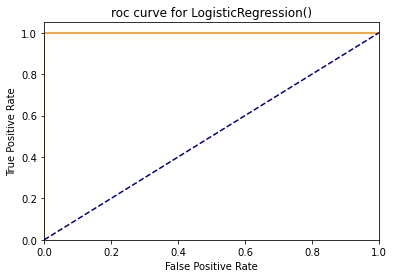


************Area under the curve******************
1.0
None
****************************************************************************************************
****************************************************************************************************

SVC
****************Train Score******************
1.0

*****************Test Score******************
1.0

************Confusion Matrix******************
[[104   0]
 [  0 146]]

********Classification Report******************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       104
           1       1.00      1.00      1.00       146

    accuracy                           1.00       250
   macro avg       1.00      1.00      1.00       250
weighted avg       1.00      1.00      1.00       250


ROC Curve


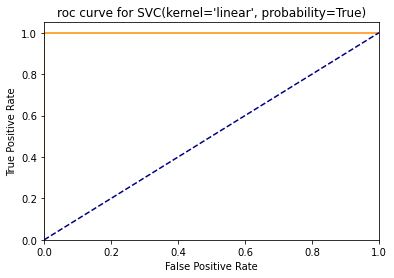


************Area under the curve******************
1.0
None
****************************************************************************************************
****************************************************************************************************

Decision Tree
****************Train Score******************
1.0

*****************Test Score******************
1.0

************Confusion Matrix******************
[[104   0]
 [  0 146]]

********Classification Report******************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       104
           1       1.00      1.00      1.00       146

    accuracy                           1.00       250
   macro avg       1.00      1.00      1.00       250
weighted avg       1.00      1.00      1.00       250


ROC Curve


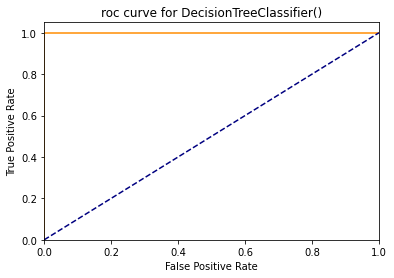


************Area under the curve******************
1.0
None
****************************************************************************************************
****************************************************************************************************

Random Forest
****************Train Score******************
1.0

*****************Test Score******************
1.0

************Confusion Matrix******************
[[104   0]
 [  0 146]]

********Classification Report******************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       104
           1       1.00      1.00      1.00       146

    accuracy                           1.00       250
   macro avg       1.00      1.00      1.00       250
weighted avg       1.00      1.00      1.00       250


ROC Curve


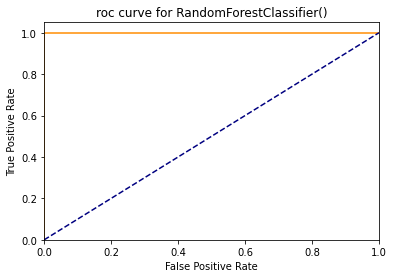


************Area under the curve******************
1.0
None
****************************************************************************************************
****************************************************************************************************

Extra Random Tree
****************Train Score******************
1.0

*****************Test Score******************
1.0

************Confusion Matrix******************
[[104   0]
 [  0 146]]

********Classification Report******************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       104
           1       1.00      1.00      1.00       146

    accuracy                           1.00       250
   macro avg       1.00      1.00      1.00       250
weighted avg       1.00      1.00      1.00       250


ROC Curve


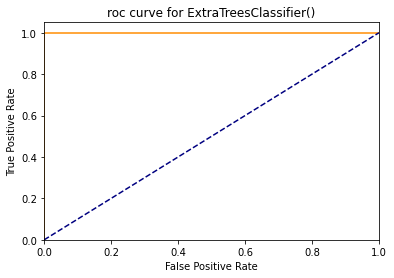


************Area under the curve******************
1.0
None
****************************************************************************************************
****************************************************************************************************

AdaBoost
****************Train Score******************
1.0

*****************Test Score******************
1.0

************Confusion Matrix******************
[[104   0]
 [  0 146]]

********Classification Report******************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       104
           1       1.00      1.00      1.00       146

    accuracy                           1.00       250
   macro avg       1.00      1.00      1.00       250
weighted avg       1.00      1.00      1.00       250


ROC Curve


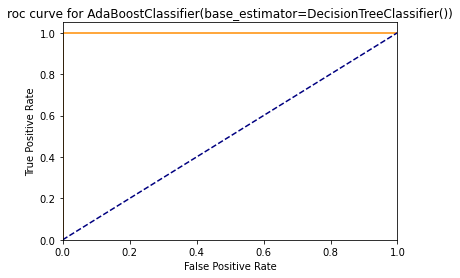


************Area under the curve******************
1.0
None
****************************************************************************************************
****************************************************************************************************



In [97]:
# score for different models using test data
print('SGD Classifier')
print(test_score(sgd))
print("*"*100)
print("*"*100)
print('')

print('Logistic Regression')
print(test_score(lr))
print("*"*100)
print("*"*100)
print('')

print('SVC')
print(test_score(svc))
print("*"*100)
print("*"*100)
print('')

print('Decision Tree')
print(test_score(dt))
print("*"*100)
print("*"*100)
print('')

print('Random Forest')
print(test_score(rf))
print("*"*100)
print("*"*100)
print('')

print('Extra Random Tree')
print(test_score(rt))
print("*"*100)
print("*"*100)
print('')

print('AdaBoost')
print(test_score(ab))
print("*"*100)
print("*"*100)
print('')

In [98]:
#defining function for model scoring with test set
def model_score(model, X_train_scaled=X_train_scaled, X_test_scaled=X_test_scaled, 
               y_train=y_train,y_test=y_test):
    #printing the accuracy score
    train_score=model.score(X_train_scaled, y_train)
    test_score=model.score(X_test_scaled, y_test)
    y_pred=model.predict(X_test_scaled)
    pre_score=precision_score(y_test, y_pred)
    re_score=recall_score(y_test, y_pred)
    f_score=f1_score(y_test, y_pred)
    
    y_proba = model.predict_proba(X_test_scaled)[:,1]  #proba of positive class
    fpr, tpr, thresholds = roc_curve(y_test, y_proba)
    
    roc_auc = auc(fpr, tpr)
    result=[train_score, test_score,pre_score, re_score,f_score, roc_auc ]
    return result

In [99]:
#making dataframe on evaluation metrices
all_evaluation=pd.DataFrame({'SGD':model_score(sgd),
                            'logistic Reg':model_score(lr),
                            'svc':model_score(svc),
                            'Decision Tree':model_score(dt),
                           'Random Forest':model_score(rf),
                            'Extra Random Tree':model_score(rt),
                           'Ada Boost':model_score(ab)}
                           ,index=['train score','test score', 
                                   'precision_score', 'recall_score', 'f1_score', 'auc'])
all_evaluation

,SGD,logistic Reg,svc,Decision Tree,Random Forest,Extra Random Tree,Ada Boost
train score,1.0,1.0,1.0,1.0,1.0,1.0,1.0
test score,1.0,1.0,1.0,1.0,1.0,1.0,1.0
precision_score,1.0,1.0,1.0,1.0,1.0,1.0,1.0
recall_score,1.0,1.0,1.0,1.0,1.0,1.0,1.0
f1_score,1.0,1.0,1.0,1.0,1.0,1.0,1.0
auc,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [94]:
all_evaluation.to_html('Resources/Cleaned_data/under_metrics.html')

## Trying to improve score by selecting important features based on Adaboost


In [70]:
#selecting and fitting model
sel = SelectFromModel(ab)
sel.fit(X_train_scaled, y_train)

SelectFromModel(estimator=AdaBoostClassifier(base_estimator=RandomForestClassifier()))

In [71]:
sel.get_support()

array([False, False, False,  True,  True, False, False, False,  True,
        True, False,  True, False,  True,  True, False, False,  True,
       False, False, False, False, False])

In [72]:
#splitting data using train_test split
X_train_sel, X_test_sel, y_train, y_test=train_test_split(sel.transform(X), y_label, random_state=1)

scaler1 = StandardScaler().fit(X_train_sel)
X_selected_train_scaled = scaler1.transform(X_train_sel)
X_selected_test_scaled = scaler1.transform(X_test_sel)


### SGD Classifier after selecting important features

In [73]:
#after model selection
sgd_s = SGDClassifier(random_state=42, loss='log').fit(X_selected_train_scaled, y_train)
print(f'Training Score: {sgd_s.score(X_selected_train_scaled, y_train)}')
print(f'Testing Score: {sgd_s.score(X_selected_test_scaled, y_test)}')

Training Score: 0.9906666666666667
Testing Score: 0.988


### Logistic Regression after selecting important features

In [74]:
#after model selection
lr_s = LogisticRegression().fit(X_selected_train_scaled, y_train)
print(f'Training Score: {lr_s.score(X_selected_train_scaled, y_train)}')
print(f'Testing Score: {lr_s.score(X_selected_test_scaled, y_test)}')

Training Score: 0.984
Testing Score: 0.968


### SVC after selecting important features

In [75]:
#after model selection
# Support vector machine linear classifier
svc_s=SVC(kernel='linear', probability=True).fit(X_selected_train_scaled, y_train)
print(f'Training Score: {svc_s.score(X_selected_train_scaled, y_train)}')
print(f'Testing Score: {svc_s.score(X_selected_test_scaled, y_test)}')

Training Score: 1.0
Testing Score: 1.0


### Decision Tree after selecting important features

In [76]:
#after model selection
dt_s = DecisionTreeClassifier().fit(X_selected_train_scaled, y_train)
print(f'Training Score: {dt_s.score(X_selected_train_scaled, y_train)}')
print(f'Testing Score: {dt_s.score(X_selected_test_scaled, y_test)}')

Training Score: 1.0
Testing Score: 1.0


### Random Forest after selecting important features

In [77]:
#after model selection
rf_s = RandomForestClassifier().fit(X_selected_train_scaled, y_train)
print(f'Training Score: {rf_s.score(X_selected_train_scaled, y_train)}')
print(f'Testing Score: {rf_s.score(X_selected_test_scaled, y_test)}')

Training Score: 1.0
Testing Score: 1.0


### Extra Random Tree after selecting important features

In [78]:
#after model selection
rt_s = RandomForestClassifier().fit(X_selected_train_scaled, y_train)
rt_s_train=rt_s.score(X_selected_train_scaled, y_train)
rt_s_test=rt_s.score(X_selected_test_scaled, y_test)
print(f'Training Score: {rt_s_train}')
print(f'Testing Score: {rt_s_test}')

Training Score: 1.0
Testing Score: 1.0


In [79]:
#defining function for model scoring with test set
def model_imp_feat(model, X_train_scaled=X_selected_train_scaled, X_test_scaled=X_selected_test_scaled, 
               y_train=y_train,y_test=y_test):
    #printing the accuracy score
    train_score=model.score(X_train_scaled, y_train)
    test_score=model.score(X_test_scaled, y_test)
    y_pred=model.predict(X_test_scaled)
    pre_score=precision_score(y_test, y_pred)
    re_score=recall_score(y_test, y_pred)
    f_score=f1_score(y_test, y_pred)
    
    y_proba = model.predict_proba(X_test_scaled)[:,1]  #proba of positive class
    fpr, tpr, thresholds = roc_curve(y_test, y_proba)
    
    roc_auc = auc(fpr, tpr)
    result=[train_score, test_score,pre_score, re_score,f_score, roc_auc ]
    return result

## Saving the best model

In [133]:
import joblib
joblib.dump(rf, 'model_cancer.pkl')

['model_cancer.pkl']

In [80]:
#making dataframe on evaluation metrices
all_evaluation_imp_feat=pd.DataFrame({'SGD':model_imp_feat(sgd_s),
                            'logistic Reg':model_imp_feat(lr_s),
                            'svc':model_imp_feat(svc_s),
                            'Decision Tree':model_imp_feat(dt_s),
                           'Random Forest':model_imp_feat(rf_s),
                            'Extra Random Tree':model_imp_feat(rt_s)}
                           ,index=['train score','test score', 
                                   'precision_score', 'recall_score', 'f1_score', 'auc'])
all_evaluation_imp_feat

ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].

In [96]:
all_evaluation_imp_feat.to_html('Resources/Cleaned_data/under_metrics_imp.html')